### Deliverable 1: Preprocessing the Data for a Neural Network

In [2]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

In [3]:
# Mount Google Drive in order to import csv files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Define filepath relative to drive
charity_file = "/content/drive/MyDrive/Colab_Data_Science_MISC/charity_data.csv"

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv(charity_file)
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [5]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=['EIN', 'NAME'])
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [6]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [7]:
# Look at APPLICATION_TYPE value counts for binning
app_type_cnts =application_df['APPLICATION_TYPE'].value_counts()
app_type_cnts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

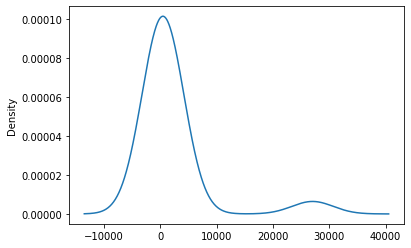

In [8]:
# Visualize the value counts of APPLICATION_TYPE
app_type_cnts.plot.density()

In [9]:
# Determine which values to replace if counts are less than ...?
replace_application = list(app_type_cnts[app_type_cnts < 500].index)
# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [10]:
# Look at CLASSIFICATION value counts for binning
class_cnts = application_df['CLASSIFICATION'].value_counts()
class_cnts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [10]:
# list complete set of value counts
for i, c in class_cnts.to_dict().items():
  print(i, c)

C1000 17326
C2000 6074
C1200 4837
C3000 1918
C2100 1883
C7000 777
C1700 287
C4000 194
C5000 116
C1270 114
C2700 104
C2800 95
C7100 75
C1300 58
C1280 50
C1230 36
C1400 34
C7200 32
C2300 32
C1240 30
C8000 20
C7120 18
C1500 16
C1800 15
C6000 15
C1250 14
C8200 11
C1238 10
C1278 10
C1235 9
C1237 9
C7210 7
C2400 6
C1720 6
C4100 6
C1257 5
C1600 5
C1260 3
C2710 3
C0 3
C3200 2
C1234 2
C1246 2
C1267 2
C1256 2
C2190 1
C4200 1
C2600 1
C5200 1
C1370 1
C1248 1
C6100 1
C1820 1
C1900 1
C1236 1
C3700 1
C2570 1
C1580 1
C1245 1
C2500 1
C1570 1
C1283 1
C2380 1
C1732 1
C1728 1
C2170 1
C4120 1
C8210 1
C2561 1
C4500 1
C2150 1


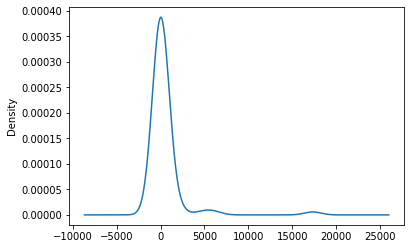

In [11]:
# Visualize the value counts of CLASSIFICATION
class_cnts.plot.density()

In [12]:
# Determine which values to replace if counts are less than ..?
replace_class = list(class_cnts[class_cnts < 1500].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [14]:
# Generate our categorical variable lists
application_cat = list(application_df.dtypes[application_df.dtypes == "object"].index)
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [15]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [16]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df, left_index=True, right_index=True)
application_df = application_df.drop(application_cat, 1)
application_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [18]:
# Split our preprocessed data into our features and target arrays
y = application_df['IS_SUCCESSFUL'].values
X = application_df.drop(columns=['IS_SUCCESSFUL']).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [19]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [20]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 5
hidden_nodes_layer2 = 3

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 220       
                                                                 
 dense_1 (Dense)             (None, 3)                 18        
                                                                 
 dense_2 (Dense)             (None, 1)                 4         
                                                                 
Total params: 242
Trainable params: 242
Non-trainable params: 0
_________________________________________________________________


In [21]:
!pip install pyyaml h5py  # Required to save models in HDF5 format

In [22]:
# import dependencies for checkpointing
import os
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)


In [23]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [24]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath = checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1,
                                                 save_freq=5)

In [25]:
# Train the model
fit_model = nn.fit(X_train,
                   y_train,
                   epochs=100,
                   callbacks=[cp_callback])

Streaming output truncated to the last 5000 lines.

Epoch 85: saving model to training_1/cp.ckpt
449/804 [===============>..............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5309
Epoch 85: saving model to training_1/cp.ckpt

Epoch 85: saving model to training_1/cp.ckpt
459/804 [================>.............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5307
Epoch 85: saving model to training_1/cp.ckpt

Epoch 85: saving model to training_1/cp.ckpt
469/804 [================>.............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5300
Epoch 85: saving model to training_1/cp.ckpt
478/804 [================>.............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5298
Epoch 85: saving model to training_1/cp.ckpt

Epoch 85: saving model to training_1/cp.ckpt
484/804 [=================>............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5301
Epoch 85: saving model to training_1/cp.ckpt

Epoch 85: saving model to training_1/cp.ckpt
494/804 [=================>............] - ETA: 2s - loss: 0.6914 - a

In [26]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.7940 - accuracy: 0.6023 - 439ms/epoch - 2ms/step
Loss: 0.7939538955688477, Accuracy: 0.602332353591919


### Deliverable 3 - Model Optimization

In [53]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 4
hidden_nodes_layer2 = 6
hidden_nodes_layer3 = 4 

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 4)                 176       
                                                                 
 dense_16 (Dense)            (None, 6)                 30        
                                                                 
 dense_17 (Dense)            (None, 4)                 28        
                                                                 
 dense_18 (Dense)            (None, 1)                 5         
                                                                 
Total params: 239
Trainable params: 239
Non-trainable params: 0
_________________________________________________________________


In [54]:
# import dependencies for checkpointing
import os
checkpoint_path = "training_2/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

In [55]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [56]:
# Define callback for checkpoints
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath = checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1,
                                                 save_freq=5)

In [57]:
# Train the model
fit_model = nn.fit(X_train,
                   y_train,
                   epochs=50,
                   callbacks=[cp_callback])

Streaming output truncated to the last 5000 lines.
Epoch 35: saving model to training_2/cp.ckpt
444/804 [===============>..............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5310
Epoch 35: saving model to training_2/cp.ckpt

Epoch 35: saving model to training_2/cp.ckpt
454/804 [===============>..............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5314
Epoch 35: saving model to training_2/cp.ckpt

Epoch 35: saving model to training_2/cp.ckpt
464/804 [================>.............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5306
Epoch 35: saving model to training_2/cp.ckpt

Epoch 35: saving model to training_2/cp.ckpt
474/804 [================>.............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5304
Epoch 35: saving model to training_2/cp.ckpt

Epoch 35: saving model to training_2/cp.ckpt
484/804 [=================>............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5305
Epoch 35: saving model to training_2/cp.ckpt
492/804 [=================>............] - ETA: 2s - loss: 0.6913 - ac

In [58]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.7249 - accuracy: 0.4367 - 411ms/epoch - 2ms/step
Loss: 0.7249101400375366, Accuracy: 0.43673470616340637


*Accuracy appears to have decreased w/ additional hidden layer. The model seems to plateau early; reducing layers and epochs but adding neurons*

In [59]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
# going by heuristic of 
hidden_nodes_layer1 = 9
hidden_nodes_layer2 = 7
# hidden_nodes_layer3 = 4 

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
# nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 9)                 396       
                                                                 
 dense_20 (Dense)            (None, 7)                 70        
                                                                 
 dense_21 (Dense)            (None, 1)                 8         
                                                                 
Total params: 474
Trainable params: 474
Non-trainable params: 0
_________________________________________________________________


In [60]:
# defining new checkpoint path
import os
checkpoint_path = "training_3/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

In [61]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [62]:
# Define callback for checkpoints
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath = checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1,
                                                 save_freq=5)

In [63]:
# Train the model
fit_model = nn.fit(X_train,
                   y_train,
                   epochs=30,
                   callbacks=[cp_callback])

Streaming output truncated to the last 5000 lines.
444/804 [===============>..............] - ETA: 2s - loss: 3008.8223 - accuracy: 0.5503
Epoch 15: saving model to training_3/cp.ckpt

Epoch 15: saving model to training_3/cp.ckpt
454/804 [===============>..............] - ETA: 2s - loss: 2948.8455 - accuracy: 0.5519
Epoch 15: saving model to training_3/cp.ckpt

Epoch 15: saving model to training_3/cp.ckpt
464/804 [================>.............] - ETA: 2s - loss: 2887.7781 - accuracy: 0.5535
Epoch 15: saving model to training_3/cp.ckpt

Epoch 15: saving model to training_3/cp.ckpt
474/804 [================>.............] - ETA: 2s - loss: 2828.6157 - accuracy: 0.5555
Epoch 15: saving model to training_3/cp.ckpt

Epoch 15: saving model to training_3/cp.ckpt
484/804 [=================>............] - ETA: 2s - loss: 2770.5244 - accuracy: 0.5569
Epoch 15: saving model to training_3/cp.ckpt

Epoch 15: saving model to training_3/cp.ckpt
494/804 [=================>............] - ETA: 2s - l

In [64]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 1.7178 - accuracy: 0.5345 - 1s/epoch - 4ms/step
Loss: 1.717759370803833, Accuracy: 0.5344606637954712


*Accuracy improved but not significantly, perhaps there were too few epochs this time around*

In [65]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
# going by heuristic of 
hidden_nodes_layer1 = 7
hidden_nodes_layer2 = 5
hidden_nodes_layer3 = 3 

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 7)                 308       
                                                                 
 dense_23 (Dense)            (None, 5)                 40        
                                                                 
 dense_24 (Dense)            (None, 3)                 18        
                                                                 
 dense_25 (Dense)            (None, 1)                 4         
                                                                 
Total params: 370
Trainable params: 370
Non-trainable params: 0
_________________________________________________________________


In [66]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [67]:
# Train the model
fit_model = nn.fit(X_train,
                   y_train,
                   epochs=50,
                   #callbacks=[cp_callback]
                   )

Epoch 1/50
804/804 [==============================] - 2s 2ms/step - loss: 5352.6040 - accuracy: 0.4964
Epoch 2/50
804/804 [==============================] - 1s 2ms/step - loss: 5105.0688 - accuracy: 0.5005
Epoch 3/50
804/804 [==============================] - 1s 2ms/step - loss: 11381.4199 - accuracy: 0.5075
Epoch 4/50
804/804 [==============================] - 1s 2ms/step - loss: 9099.1631 - accuracy: 0.5110
Epoch 5/50
804/804 [==============================] - 1s 2ms/step - loss: 6089.9697 - accuracy: 0.5178
Epoch 6/50
804/804 [==============================] - 1s 2ms/step - loss: 3960.5369 - accuracy: 0.5250
Epoch 7/50
804/804 [==============================] - 1s 2ms/step - loss: 4298.7354 - accuracy: 0.5290
Epoch 8/50
804/804 [==============================] - 1s 2ms/step - loss: 359.3983 - accuracy: 0.5650
Epoch 9/50
804/804 [==============================] - 1s 2ms/step - loss: 2411.7639 - accuracy: 0.5161
Epoch 10/50
804/804 [==============================] - 1s 2ms/step - loss

In [68]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.6313 - accuracy: 0.6454 - 1s/epoch - 5ms/step
Loss: 0.6313232779502869, Accuracy: 0.6453644037246704


*Attempting one more time w/ Tahn function in hidden layer*

In [70]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
# going by heuristic of 
hidden_nodes_layer1 = 7
hidden_nodes_layer2 = 5
hidden_nodes_layer3 = 3 

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 7)                 308       
                                                                 
 dense_29 (Dense)            (None, 5)                 40        
                                                                 
 dense_30 (Dense)            (None, 3)                 18        
                                                                 
 dense_31 (Dense)            (None, 1)                 4         
                                                                 
Total params: 370
Trainable params: 370
Non-trainable params: 0
_________________________________________________________________


In [71]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [72]:
# Train the model
fit_model = nn.fit(X_train,
                   y_train,
                   epochs=33,
                   #callbacks=[cp_callback]
                   )

Epoch 1/33
804/804 [==============================] - 3s 2ms/step - loss: 0.7167 - accuracy: 0.5082
Epoch 2/33
804/804 [==============================] - 1s 2ms/step - loss: 0.6912 - accuracy: 0.5316
Epoch 3/33
804/804 [==============================] - 1s 2ms/step - loss: 0.6913 - accuracy: 0.5316
Epoch 4/33
804/804 [==============================] - 1s 2ms/step - loss: 0.6913 - accuracy: 0.5316
Epoch 5/33
804/804 [==============================] - 1s 2ms/step - loss: 0.6912 - accuracy: 0.5316
Epoch 6/33
804/804 [==============================] - 1s 2ms/step - loss: 0.6913 - accuracy: 0.5316
Epoch 7/33
804/804 [==============================] - 1s 2ms/step - loss: 0.6912 - accuracy: 0.5316
Epoch 8/33
804/804 [==============================] - 1s 2ms/step - loss: 0.6913 - accuracy: 0.5316
Epoch 9/33
804/804 [==============================] - 1s 2ms/step - loss: 0.6912 - accuracy: 0.5316
Epoch 10/33
804/804 [==============================] - 1s 2ms/step - loss: 0.6912 - accuracy: 0.5316

In [73]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.6799 - accuracy: 0.5826 - 726ms/epoch - 3ms/step
Loss: 0.6799274682998657, Accuracy: 0.5826238989830017


*Performance dropped from Relu, trying one last time w/ an extra hidden layer*

In [74]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
# going by heuristic of 
hidden_nodes_layer1 = 7
hidden_nodes_layer2 = 5
hidden_nodes_layer3 = 3 
hidden_nodes_layer4 = 2

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Fourth hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 7)                 308       
                                                                 
 dense_33 (Dense)            (None, 5)                 40        
                                                                 
 dense_34 (Dense)            (None, 3)                 18        
                                                                 
 dense_35 (Dense)            (None, 3)                 12        
                                                                 
 dense_36 (Dense)            (None, 1)                 4         
                                                                 
Total params: 382
Trainable params: 382
Non-trainable params: 0
_________________________________________________________________


In [75]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [76]:
# Train the model
fit_model = nn.fit(X_train,
                   y_train,
                   epochs=33,
                   #callbacks=[cp_callback]
                   )

Epoch 1/33
804/804 [==============================] - 6s 4ms/step - loss: 29124.5215 - accuracy: 0.4684
Epoch 2/33
804/804 [==============================] - 2s 3ms/step - loss: 1159.6514 - accuracy: 0.4982
Epoch 3/33
804/804 [==============================] - 1s 2ms/step - loss: 0.7591 - accuracy: 0.5316
Epoch 4/33
804/804 [==============================] - 1s 2ms/step - loss: 0.7122 - accuracy: 0.5316
Epoch 5/33
804/804 [==============================] - 1s 2ms/step - loss: 0.6951 - accuracy: 0.5316
Epoch 6/33
804/804 [==============================] - 1s 2ms/step - loss: 0.6916 - accuracy: 0.5316
Epoch 7/33
804/804 [==============================] - 1s 2ms/step - loss: 0.6912 - accuracy: 0.5316
Epoch 8/33
804/804 [==============================] - 1s 2ms/step - loss: 0.6912 - accuracy: 0.5316
Epoch 9/33
804/804 [==============================] - 2s 2ms/step - loss: 0.6912 - accuracy: 0.5316
Epoch 10/33
804/804 [==============================] - 1s 2ms/step - loss: 0.6912 - accuracy:

In [77]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.6914 - accuracy: 0.5339 - 1s/epoch - 4ms/step
Loss: 0.6914383769035339, Accuracy: 0.5338775515556335


In [78]:
os.listdir(checkpoint_dir)

['checkpoint', 'cp.ckpt.data-00000-of-00001', 'cp.ckpt.index']